## 1. Importer les packages

In [167]:
import pandas as pd

# 2. Charger les données

In [168]:
data = pd.read_csv('dataset_sdn.csv')

In [169]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [170]:
data.shape

(104345, 23)

## Analyse des données

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [172]:
data['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [173]:
data['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [174]:
data['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [175]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

# 4. Pretraitement des donnees

In [176]:
IP_mapping = {
    '10.0.0.1':0,
    '10.0.0.2':1,
    '10.0.0.3':2,
    '10.0.0.4':3,
    '10.0.0.5':4,
    '10.0.0.6':5,
    '10.0.0.7':6,
    '10.0.0.8':7,
    '10.0.0.9':8,
    '10.0.0.10':9,
    '10.0.0.11':10,
    '10.0.0.12':11,
    '10.0.0.13':12,
    '10.0.0.14':13,
    '10.0.0.15':14,
    '10.0.0.16':15,
    '10.0.0.17':16,
    '10.0.0.18':17,
    '10.0.0.20':18
}
data['src'] = data['src'].map(IP_mapping) 

In [177]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,1,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,1,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,1,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,4,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,4,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
encodage1 = LabelEncoder()
data['dst'] = encodage1.fit_transform(data['dst'])
data['Protocol'] = encodage1.fit_transform(data['Protocol'])

In [180]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0


In [181]:
import seaborn as sns

<Axes: >

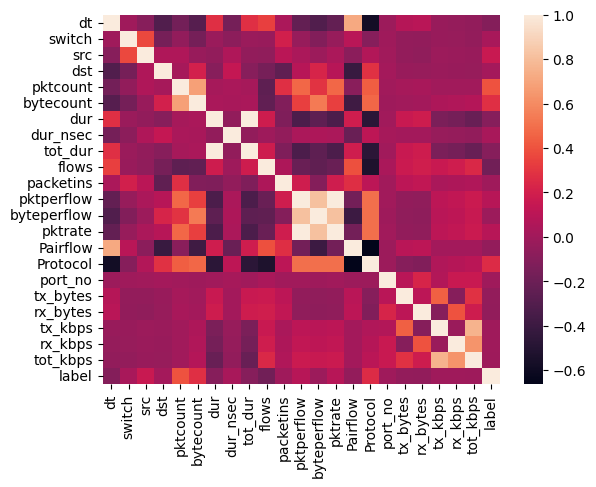

In [182]:
sns.heatmap(data.corr(), annot = False)

In [183]:
data.corr().label.sort_values(ascending =False)

label          1.000000
pktcount       0.401894
bytecount      0.277481
Protocol       0.258355
src            0.161170
pktrate        0.088013
pktperflow     0.087819
dur_nsec       0.029064
switch         0.028027
dst            0.016282
packetins     -0.002642
port_no       -0.004734
tx_kbps       -0.006297
rx_kbps       -0.006714
tot_kbps      -0.008748
byteperflow   -0.015192
Pairflow      -0.049159
tx_bytes      -0.050115
rx_bytes      -0.057490
dur           -0.098479
tot_dur       -0.098491
dt            -0.110126
flows         -0.182174
Name: label, dtype: float64

In [184]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [185]:
subset = data[['pktcount', 'bytecount', 'Protocol', 'src', 'pktrate','pktperflow','dur_nsec', 'switch', 'dst', 'label']] 

In [186]:
subset.head()

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,0,451,13535,716000000,1,16,0
1,126395,134737070,2,0,451,13531,734000000,1,16,0
2,90333,96294978,2,1,451,13534,744000000,1,16,0
3,90333,96294978,2,1,451,13534,744000000,1,16,0
4,90333,96294978,2,1,451,13534,744000000,1,16,0


In [187]:
subset.isnull().sum()

pktcount      0
bytecount     0
Protocol      0
src           0
pktrate       0
pktperflow    0
dur_nsec      0
switch        0
dst           0
label         0
dtype: int64

## Division des données

In [188]:
X = subset.iloc[:,:-1]
y = subset.iloc[:, -1]

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [190]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (73041, 9)
y_train shape:  (73041,)
X_test shape:  (31304, 9)
y_test shape:  (31304,)


In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Construire le Shallow Neural Network

In [193]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [194]:
model = Sequential()

In [195]:
model.add(Dense(10, input_shape = (9, ), activation='relu'))
#Ajout de la couche de sortie
model.add(Dense(1, activation='sigmoid'))
#Compiler le model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
#Affichage
model.summary()

C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [196]:
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8761 - loss: 0.2856 - val_accuracy: 0.9263 - val_loss: 0.1733
Epoch 2/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9254 - loss: 0.1742 - val_accuracy: 0.9281 - val_loss: 0.1605
Epoch 3/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9352 - loss: 0.1571 - val_accuracy: 0.9331 - val_loss: 0.1623
Epoch 4/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9369 - loss: 0.1493 - val_accuracy: 0.9297 - val_loss: 0.1709
Epoch 5/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9381 - loss: 0.1521 - val_accuracy: 0.9434 - val_loss: 0.1363
Epoch 6/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9439 - loss: 0.1407 - val_accuracy: 0.9485 - val_loss: 0.1342
Epoch 7/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9466 - loss: 0.1383 - val_accuracy: 0.9395 - val_loss: 0.1457
Epoch 8/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9481 - loss: 0.1387 

In [206]:
# 7. Visualiser l’evolution de l’entrainement du réseau de neurone
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

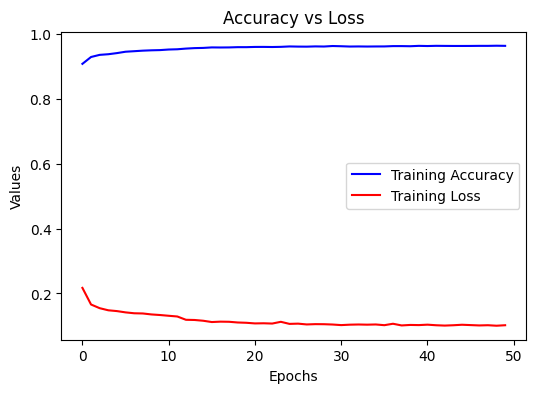

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

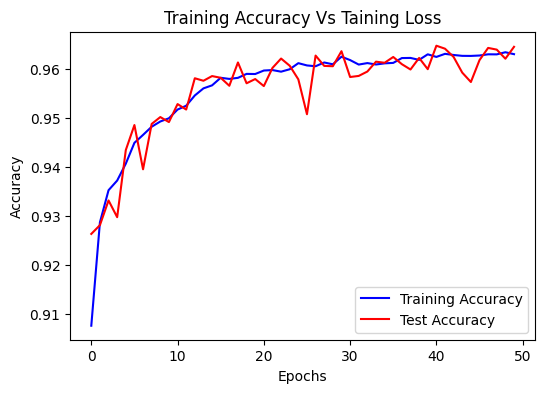

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

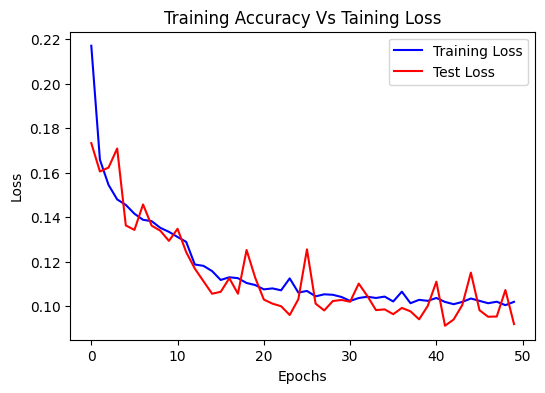

In [211]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

In [202]:
y_pred = model.predict(X_test)
y_pred

979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[1.6294187e-05],
       [1.0765524e-04],
       [9.7726506e-01],
       ...,
       [9.9807864e-01],
       [1.1746439e-05],
       [9.6432102e-01]], dtype=float32)

# 9. Sauvegarder le modèle entrainé

In [204]:
model.save('model.h5')

# 10. Simple Prediction

In [210]:
subset.head()

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,0,451,13535,716000000,1,16,0
1,126395,134737070,2,0,451,13531,734000000,1,16,0
2,90333,96294978,2,1,451,13534,744000000,1,16,0
3,90333,96294978,2,1,451,13534,744000000,1,16,0
4,90333,96294978,2,1,451,13534,744000000,1,16,0


In [212]:
# Une simple prediction 
model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[8.5451225e-05]], dtype=float32)

In [214]:
subset[subset['label'] == 1]

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
91,4777,5092282,2,0,0,0,711000000,1,16,1
92,4777,5092282,2,0,0,0,711000000,1,16,1
93,4777,5092282,2,0,0,0,711000000,1,16,1
94,4777,5092282,2,0,0,0,711000000,1,16,1
95,4777,5092282,2,0,0,0,711000000,1,16,1
...,...,...,...,...,...,...,...,...,...,...
100037,129558,134999436,0,8,101,3049,981000000,4,14,1
100038,129558,134999436,0,8,101,3049,981000000,4,14,1
100051,129986,135445412,0,5,101,3049,235000000,3,17,1
100052,129986,135445412,0,5,101,3049,235000000,3,17,1


In [215]:
# Une simple prediction 
model.predict(scaler.transform([[4777,	5092282,	2,	1,	0,	0,	711000000,	1,	16	]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.99695987]], dtype=float32)

In [216]:
resultats_1 = model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [217]:
if resultats_1 > 0.5:
    print("Malign")
else :
    print("Benign")

Benign


In [218]:
resultats_2 = model.predict(scaler.transform([[4777,	5092282,	2,	1,	0,	0,	711000000,	1,	16	]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [219]:
resultats_2

array([[0.99695987]], dtype=float32)

In [220]:
if resultats_2 > 0.5:
    print("Malign")
else :
    print("Benign")

Malign
